In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
data = pickle.load(open("merged_data.pkl",'rb'))
data = pd.DataFrame(data)

In [3]:
data

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0     Afghanistan  1990       0.228979          0.721207         0.131001   
1     Afghanistan  1991       0.228120          0.719952         0.126395   
2     Afghanistan  1992       0.227328          0.718418         0.121832   
3     Afghanistan  1993       0.226468          0.717452         0.117942   
4     Afghanistan  1994       0.225567          0.717012         0.114547   
...           ...   ...            ...               ...              ...   
6835     Zimbabwe  2015       0.209359          0.560882         0.099610   
6836     Zimbabwe  2016       0.209979          0.561768         0.100821   
6837     Zimbabwe  2017       0.210631          0.562612         0.101671   
6838     Zimbabwe  2018       0.211237          0.563283         0.102398   
6839     Zimbabwe  2019       0.211969          0.563820         0.102902   

       Anxiety  Drug_usage  Depression   Alcohol  Mental_fitness  
0     4.835127    0.454202    5.125291  0.444036        1.696670  
1     4.821765    0.447112    5.116306  0.444250        1.734281  
2     4.801434    0.441190    5.106558  0.445501        1.791189  
3     4.789363    0.435581    5.100328  0.445958        1.776779  
4     4.784923    0.431822    5.099424  0.445779        1.712986  
...        ...         ...         ...       ...             ...  
6835  3.315701    0.599604    3.548613  1.734969        2.193166  
6836  3.324230    0.603658    3.557508  1.689281        2.279813  
6837  3.330569    0.608096    3.564138  1.651805        2.364265  
6838  3.317500    0.609065    3.563141  1.686711        2.472949  
6839  3.283934    0.610644    3.554571  1.776729        2.525892  

[6840 rows x 10 columns]

[]

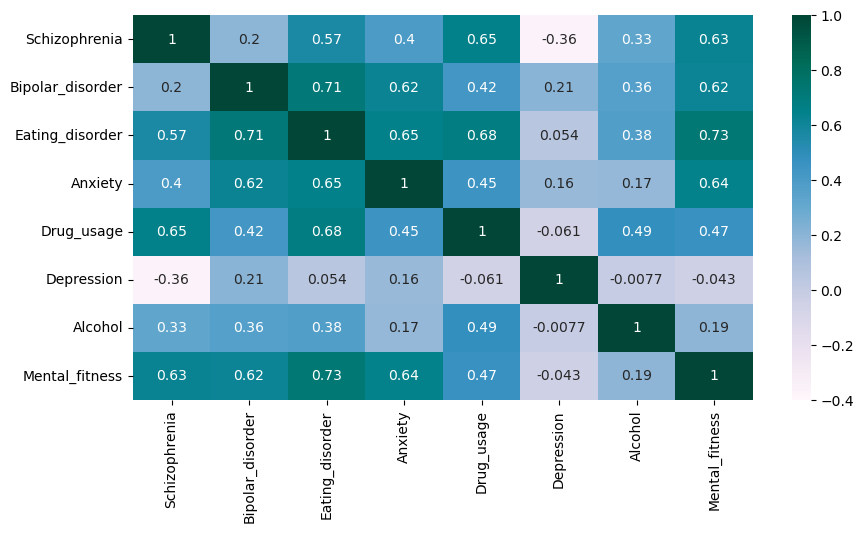

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop(['Year','Country'],axis=1).corr(),annot=True,cmap='PuBuGn',vmin=-0.4,vmax=1)
plt.plot()

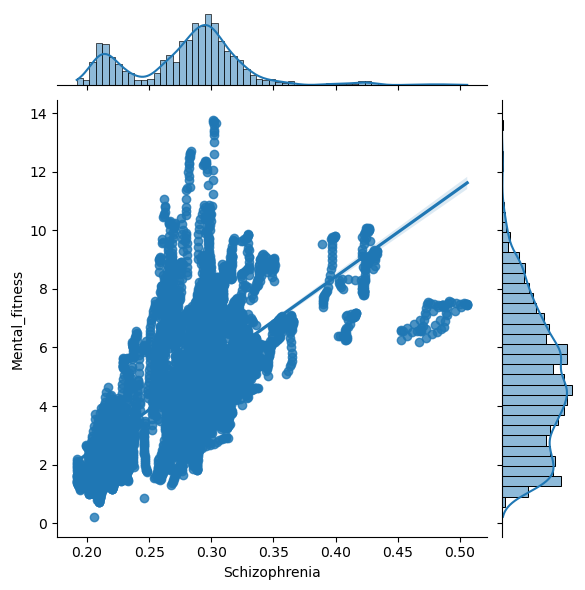

In [5]:
sns.jointplot(x='Schizophrenia',y='Mental_fitness',data=data,kind='reg')
plt.show()

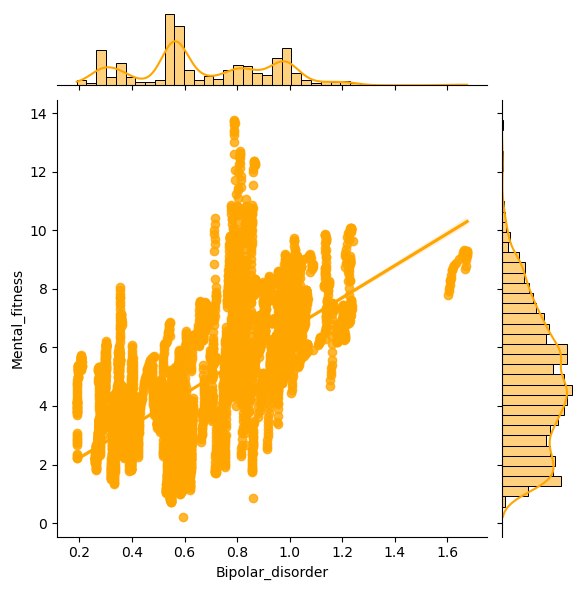

In [6]:
sns.jointplot(x='Bipolar_disorder', y='Mental_fitness', data = data, kind='reg', color='orange')
plt.show()

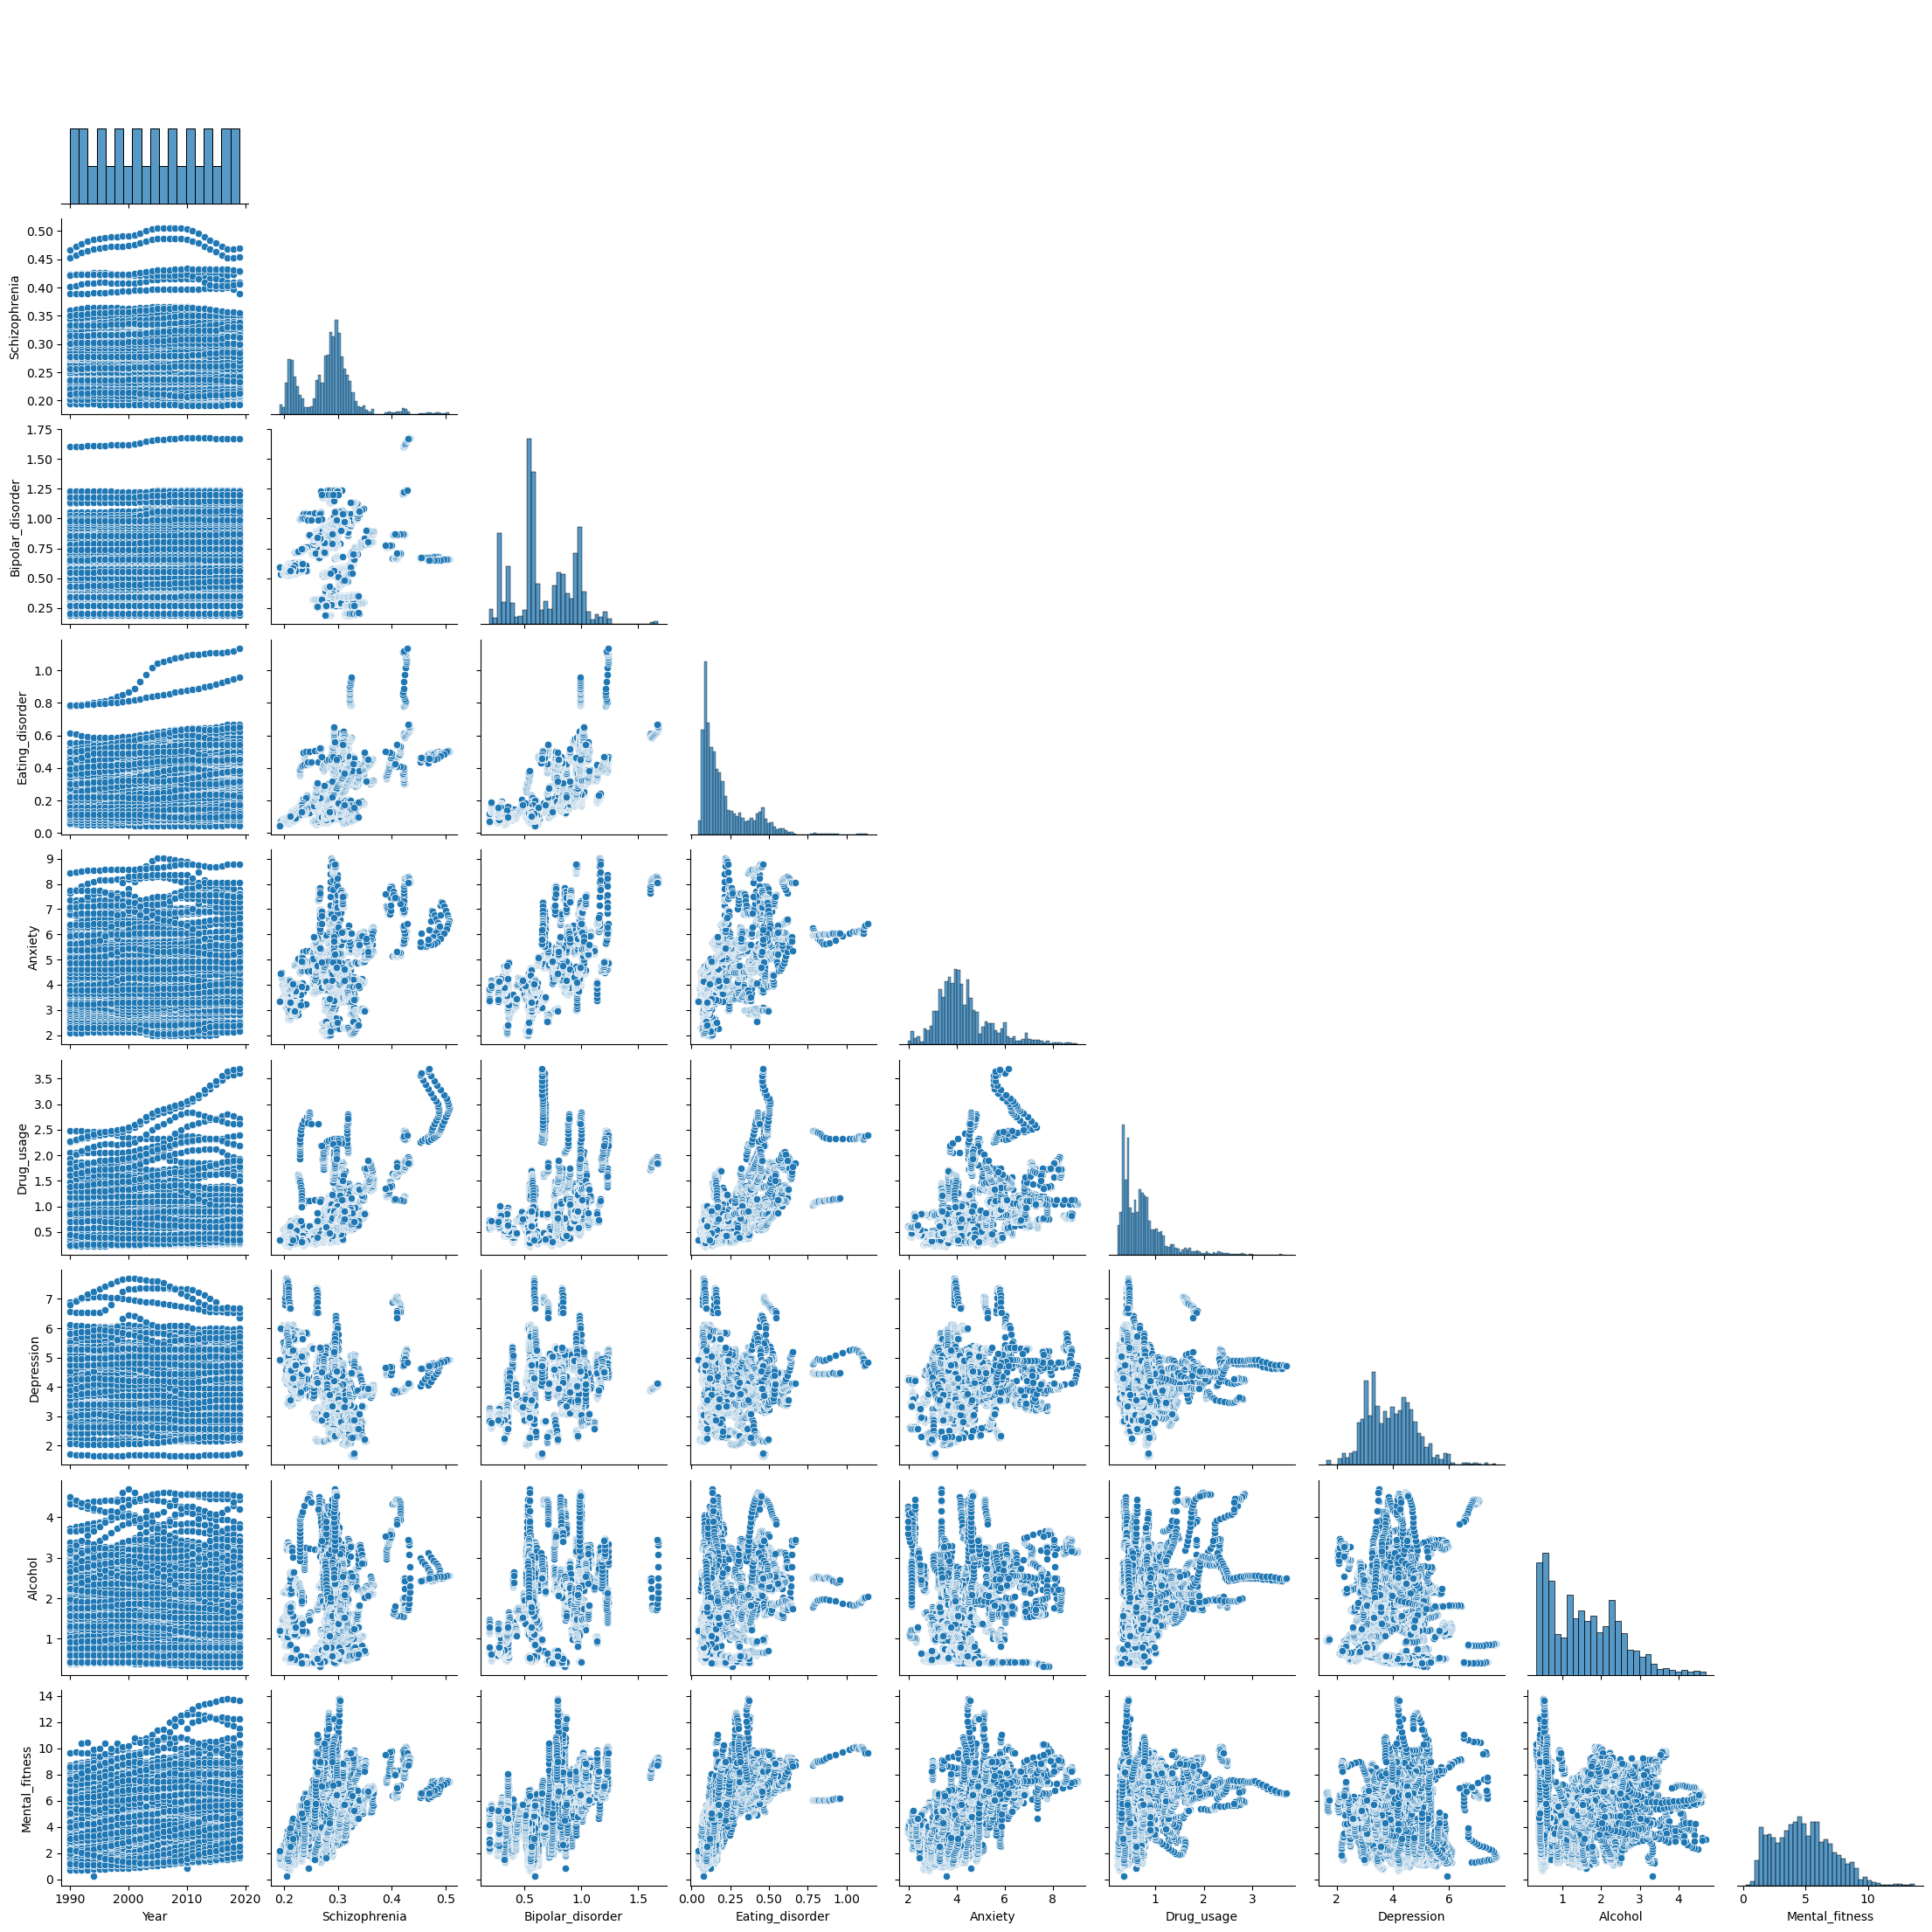

In [7]:
sns.pairplot(data,corner=True)
plt.show()

In [8]:
fig = px.pie(data, values='Mental_fitness', names='Year',template='plotly_dark')
fig.show()

In [9]:
fig = px.bar(data, x='Year', y='Mental_fitness', color='Year', template='plotly_dark')
fig.show()

In [10]:
fig = px.line(data, x="Year", y="Mental_fitness", color='Country',markers=True,color_discrete_sequence=['dodgerblue','orangered'],template='plotly_dark')
fig.show()

In [11]:
mean = data.groupby('Country')['Mental_fitness'].mean()
mean

Country
Afghanistan                       2.553085
African Region (WHO)              1.940398
Albania                           5.276702
Algeria                           6.451224
American Samoa                    4.529481
                                    ...   
World Bank Lower Middle Income    3.207812
World Bank Upper Middle Income    5.006917
Yemen                             3.470172
Zambia                            1.664278
Zimbabwe                          1.743918
Name: Mental_fitness, Length: 228, dtype: float64

In [12]:
mean_list = dict(mean)
mean_max = max(mean_list,key=lambda k: mean_list[k])
mean_min = min(mean_list,key=lambda k: mean_list[k])
mean_max,mean_list[mean_max], mean_min,mean_list[mean_min]

('Qatar', 10.95481730105946, 'Niger', 1.1214081638637468)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB
